# Программирование на языке Python
## Семинар 9. Pandas

Данные взяты [отсюда](https://github.com/datasets/covid-19).

In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Заметки
# 1 Province/State имеет пропущенные значения
# 2 Recovered почему-то float -> потому что есть пропущенные значения  ++++++++++++++
# 3 Date - дата, может потребоваться перевод в datetime  ++++++++++++++
# 4 есть смысл переназвать переменные  ++++++++++++++
# 5 связаны ли пропуски в переменных Province/State и Recovered
# 6 числовые переменные имеют некоторое количество эстремально высоких значений
# 7 некоторые страны встречаются гораздо чаще большинства (?)

#### Задание 1
Импортируйте и проведите первичное изучение данных (соответствующим типу каждой переменной).

In [2]:
covid = pd.read_csv('time-series-19-covid-combined.csv')
covid.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231744 entries, 0 to 231743
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            231744 non-null  object 
 1   Country/Region  231744 non-null  object 
 2   Province/State  72624 non-null   object 
 3   Confirmed       231744 non-null  int64  
 4   Recovered       218688 non-null  float64
 5   Deaths          231744 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.6+ MB


In [3]:
# изучение числовых переменных
numeric_cols = ['Confirmed', 'Recovered', 'Deaths']

covid[numeric_cols].describe().round(2)

,Confirmed,Recovered,Deaths
count,231744.00,218688.00,231744.00
mean,513236.17,106211.62,9760.17
std,3002239.15,839741.31,49749.87
min,0.00,0.00,0.00
25%,259.00,0.00,2.00
50%,5725.00,55.00,73.00
75%,109564.50,5002.00,1777.00
max,80625120.00,30974748.00,988609.00


In [13]:
covid['Country/Region'].value_counts()

Country/Region
China             27744
Canada            13056
United Kingdom    11424
France             9792
Australia          6528
                  ...  
Guinea              816
Guinea-Bissau       816
Guyana              816
Haiti               816
Zimbabwe            816
Name: count, Length: 198, dtype: int64

In [10]:
sample = [6, 2, 0, -800, 7] 

In [12]:
np.mean(sample)

-157.0

In [11]:
sorted(sample)

[-800, 0, 2, 6, 7]

In [14]:
covid.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [20]:
covid.sample(5)

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
116183,2020-11-28,Guyana,NaN,5338,4317.0,149
200772,2020-02-27,Taiwan*,NaN,32,5.0,1
131836,2021-04-26,"Korea, South",NaN,119898,109695.0,1820
224920,2021-06-25,Uzbekistan,NaN,108184,104007.0,725
132430,2020-09-16,Kosovo,NaN,14839,11949.0,604


In [3]:
# пункт 4, пункт 3
covid_renamed = covid.rename(columns=lambda name: name.lower().replace('/', '_'))
covid_renamed['date_dt'] = pd.to_datetime(covid_renamed['date'], format='%Y-%m-%d')

In [27]:
pd.to_datetime(covid_renamed['date'], format='%Y-%m-%d')

0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
231739   2022-04-12
231740   2022-04-13
231741   2022-04-14
231742   2022-04-15
231743   2022-04-16
Name: date, Length: 231744, dtype: datetime64[ns]

In [29]:
from datetime import datetime

In [30]:
datetime.strptime('2022-04-12', '%Y-%m-%d')

datetime.datetime(2022, 4, 12, 0, 0)

#### Задание 2
- переименуйте переменные, приведя их к более "стандартному" и удобному виду;
- проверьте данные на корректность: одинаково ли представлена история для всех стран? Есть ли пропущенные значения? Сколько их? По какому принципу они пропущены? Если ответ на эти вопросы вскроет какие-либо несоответствия в данных, предложите причины и варианты решения несоответствий;
- для всех ли стран представлены одни и те же даты? Отсортируйте датасет по стране и дате, чтобы последовательность была строго упорядочена во времени.

In [56]:
covid_renamed.head()

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
0,2020-01-22,Afghanistan,NaN,0,0.0,0,2020-01-22
1,2020-01-23,Afghanistan,NaN,0,0.0,0,2020-01-23
2,2020-01-24,Afghanistan,NaN,0,0.0,0,2020-01-24
3,2020-01-25,Afghanistan,NaN,0,0.0,0,2020-01-25
4,2020-01-26,Afghanistan,NaN,0,0.0,0,2020-01-26


In [ ]:
# Заметки
# 1 Province/State имеет пропущенные значения
# 2 Recovered почему-то float -> потому что есть пропущенные значения  ++++++++++++++
# 3 Date - дата, может потребоваться перевод в datetime  ++++++++++++++
# 4 есть смысл переназвать переменные  ++++++++++++++
# 5 связаны ли пропуски в переменных Province/State и Recovered -> не связаны  ++++++++++++++
# 6 числовые переменные имеют некоторое количество эстремально высоких значений
# 7 некоторые страны встречаются гораздо чаще большинства (?) -> по некоторым есть данные в разрезе регионов -> агрегировать данные по
# регионам там, где это необходимо  ++++++++++++++
# 8 представлена ли полная история для всех стран

# 9 агрегировать данные по регионам там, где это необходимо

In [ ]:
# Python -> pandas
# and    -> &
# or     -> |
# not    -> ~
# in     -> .isin()

# пункт 5

In [37]:
(covid_renamed['recovered'].isna() & covid_renamed['province_state'].isna()).any()

False

**Про срезы**

In [38]:
covid_renamed.head()

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
0,2020-01-22,Afghanistan,NaN,0,0.0,0,2020-01-22
1,2020-01-23,Afghanistan,NaN,0,0.0,0,2020-01-23
2,2020-01-24,Afghanistan,NaN,0,0.0,0,2020-01-24
3,2020-01-25,Afghanistan,NaN,0,0.0,0,2020-01-25
4,2020-01-26,Afghanistan,NaN,0,0.0,0,2020-01-26


**Просто квадратные скобки**

In [39]:
# для выбора нужных колонок
covid_renamed['confirmed']

0              0
1              0
2              0
3              0
4              0
           ...  
231739    247094
231740    247160
231741    247208
231742    247237
231743    247237
Name: confirmed, Length: 231744, dtype: int64

In [41]:
covid_renamed[['confirmed']]

,confirmed
0,0
1,0
2,0
3,0
4,0
...,...
231739,247094
231740,247160
231741,247208
231742,247237


In [40]:
covid_renamed[['confirmed', 'deaths']]

,confirmed,deaths
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
231739,247094,5460
231740,247160,5460
231741,247208,5462
231742,247237,5462


In [43]:
# для фильтрации по маске
covid_renamed[covid_renamed['recovered'].isna()]

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
32640,2020-01-22,Canada,Alberta,0,NaN,0,2020-01-22
32641,2020-01-23,Canada,Alberta,0,NaN,0,2020-01-23
32642,2020-01-24,Canada,Alberta,0,NaN,0,2020-01-24
32643,2020-01-25,Canada,Alberta,0,NaN,0,2020-01-25
32644,2020-01-26,Canada,Alberta,0,NaN,0,2020-01-26
...,...,...,...,...,...,...,...
45691,2022-04-12,Canada,Yukon,3940,NaN,24,2022-04-12
45692,2022-04-13,Canada,Yukon,4000,NaN,24,2022-04-13
45693,2022-04-14,Canada,Yukon,4015,NaN,24,2022-04-14
45694,2022-04-15,Canada,Yukon,4015,NaN,24,2022-04-15


**По названию**

`.loc`

In [45]:
covid_renamed.loc[[6, 9, 12], ['country_region', 'deaths']]  # по строкам, по столбцам

,country_region,deaths
6,Afghanistan,0
9,Afghanistan,0
12,Afghanistan,0


In [46]:
covid_renamed.loc[0:5, 'country_region':'deaths']  # не индексы, так что правая часть включается

,country_region,province_state,confirmed,recovered,deaths
0,Afghanistan,NaN,0,0.0,0
1,Afghanistan,NaN,0,0.0,0
2,Afghanistan,NaN,0,0.0,0
3,Afghanistan,NaN,0,0.0,0
4,Afghanistan,NaN,0,0.0,0
5,Afghanistan,NaN,0,0.0,0


In [58]:
covid_renamed['recovered'].isna().values

array([False, False, False, ..., False, False, False])

In [48]:
covid_renamed.loc[covid_renamed['recovered'].isna(), 'country_region':'deaths']

,country_region,province_state,confirmed,recovered,deaths
32640,Canada,Alberta,0,NaN,0
32641,Canada,Alberta,0,NaN,0
32642,Canada,Alberta,0,NaN,0
32643,Canada,Alberta,0,NaN,0
32644,Canada,Alberta,0,NaN,0
...,...,...,...,...,...
45691,Canada,Yukon,3940,NaN,24
45692,Canada,Yukon,4000,NaN,24
45693,Canada,Yukon,4015,NaN,24
45694,Canada,Yukon,4015,NaN,24


In [49]:
covid_renamed.loc[covid_renamed['recovered'].isna(), 'country_region']  # pd.Series

32640    Canada
32641    Canada
32642    Canada
32643    Canada
32644    Canada
          ...  
45691    Canada
45692    Canada
45693    Canada
45694    Canada
45695    Canada
Name: country_region, Length: 13056, dtype: object

**По индексу**

`.iloc` ~ index location

In [51]:
covid_renamed.iloc[0:5, 2:6]  # индексы, так что правая часть не включается

,province_state,confirmed,recovered,deaths
0,NaN,0,0.0,0
1,NaN,0,0.0,0
2,NaN,0,0.0,0
3,NaN,0,0.0,0
4,NaN,0,0.0,0


In [54]:
?pd.DataFrame.iloc

Type:        property
String form: <property object at 0x124074180>
Docstring:  
Purely integer-location based indexing for selection by position.

``.iloc[]`` is primarily integer position based (from ``0`` to
``length-1`` of the axis), but may also be used with a boolean
array.

Allowed inputs are:

- An integer, e.g. ``5``.
- A list or array of integers, e.g. ``[4, 3, 0]``.
- A slice object with ints, e.g. ``1:7``.
- A boolean array.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for indexing (one of the above).
  This is useful in method chains, when you don't have a reference to the
  calling object, but would like to base your selection on some value.
- A tuple of row and column indexes. The tuple elements consist of one of the
  above inputs, e.g. ``(0, 1)``.

``.iloc`` will raise ``IndexError`` if a requested indexer is
out-of-bounds, except *slice* indexers which allow out-of-bounds
indexing (this conforms with pyt

In [59]:
covid_renamed.iloc[covid_renamed['recovered'].isna().values, :]  # boolean indexing supported only if mask is np.ndarray

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
32640,2020-01-22,Canada,Alberta,0,NaN,0,2020-01-22
32641,2020-01-23,Canada,Alberta,0,NaN,0,2020-01-23
32642,2020-01-24,Canada,Alberta,0,NaN,0,2020-01-24
32643,2020-01-25,Canada,Alberta,0,NaN,0,2020-01-25
32644,2020-01-26,Canada,Alberta,0,NaN,0,2020-01-26
...,...,...,...,...,...,...,...
45691,2022-04-12,Canada,Yukon,3940,NaN,24,2022-04-12
45692,2022-04-13,Canada,Yukon,4000,NaN,24,2022-04-13
45693,2022-04-14,Canada,Yukon,4015,NaN,24,2022-04-14
45694,2022-04-15,Canada,Yukon,4015,NaN,24,2022-04-15


In [4]:
# пункт 7
vc = covid_renamed['country_region'].value_counts()
vc

country_region
China             27744
Canada            13056
United Kingdom    11424
France             9792
Australia          6528
                  ...  
Guinea              816
Guinea-Bissau       816
Guyana              816
Haiti               816
Zimbabwe            816
Name: count, Length: 198, dtype: int64

In [61]:
covid_renamed['country_region'].value_counts().value_counts()

count
816      190
27744      1
13056      1
11424      1
9792       1
6528       1
4080       1
2448       1
1632       1
Name: count, dtype: int64

In [5]:
unusual_countries = vc.index[vc.values != 816]

In [67]:
covid_renamed[covid_renamed['country_region'].isin(unusual_countries)]

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020-01-22
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020-01-23
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020-01-24
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020-01-25
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020-01-26
...,...,...,...,...,...,...,...
223579,2022-04-12,United Kingdom,NaN,21679280,0.0,170395,2022-04-12
223580,2022-04-13,United Kingdom,NaN,21715116,0.0,171046,2022-04-13
223581,2022-04-14,United Kingdom,NaN,21747638,0.0,171396,2022-04-14
223582,2022-04-15,United Kingdom,NaN,21747638,0.0,171396,2022-04-15


In [73]:
covid_renamed[covid_renamed['country_region'] == 'Australia']

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020-01-22
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020-01-23
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020-01-24
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020-01-25
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020-01-26
...,...,...,...,...,...,...,...
13867,2022-04-12,Australia,Western Australia,265423,0.0,87,2022-04-12
13868,2022-04-13,Australia,Western Australia,273520,0.0,89,2022-04-13
13869,2022-04-14,Australia,Western Australia,281439,0.0,90,2022-04-14
13870,2022-04-15,Australia,Western Australia,281400,0.0,90,2022-04-15


In [68]:
1 in [1, 2]

True

In [69]:
[1, 2] in [1, 2]

False

In [70]:
[1, 2] in [1, 2, [1, 2]]

True

In [72]:
pd.Series([1, 2]).isin([1, 2])

0    True
1    True
dtype: bool

#### Задание 3

Перед тем, как выполнять данное задание, подумайте, не лучше ли будет каким-либо образом поменять существующие показатели пандемии.

- как меняется соотношения типа обнаруженные / умершие и т. д. во времени (в среднемировом разрезе)?
- если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс заразить кого-нибудь больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа;
- если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс умереть больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа.

In [ ]:
# Заметки
# 6 числовые переменные имеют некоторое количество эстремально высоких значений
# 8 представлена ли полная история для всех стран  +++++++

# 9 агрегировать данные по регионам там, где это необходимо  +++++++

In [ ]:
# 9 агрегировать данные по регионам там, где это необходимо: вариант 1
# key: (date, country_region, province_state) -> (date, country_region)

In [6]:
numeric_new = ['confirmed', 'recovered', 'deaths']

In [7]:
# %%timeit

covid_agg = covid_renamed.groupby(['date', 'date_dt', 'country_region'], as_index=False)[numeric_new].sum()  # .agg(custom_function)
# covid_agg.head()

In [30]:
%%timeit
# 9: вариант 2
# divide into parts
covid_to_agg = covid_renamed[covid_renamed['country_region'].isin(unusual_countries)]
covid_notto_agg = covid_renamed[~covid_renamed['country_region'].isin(unusual_countries)].drop(columns=['province_state'])

# aggregate only necessary part
covid_to_agg_agg = covid_to_agg.groupby(['date', 'date_dt', 'country_region'], as_index=False)[numeric_new].sum()

# concatenate again
covid_agg = pd.concat([covid_to_agg_agg, covid_notto_agg], ignore_index=True)

22.2 ms ± 495 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
series1 = pd.Series([1, 2, 3, 4], index=[0, 1, 2, 3])
series2 = pd.Series([1, 2, 3, 4], index=[3, 4, 5, 6])

In [27]:
series1 - series2

0    NaN
1    NaN
2    NaN
3    3.0
4    NaN
5    NaN
6    NaN
dtype: float64

In [28]:
series1.values - series2.values

array([0, 0, 0, 0])

In [25]:
covid_agg

,date,date_dt,country_region,confirmed,recovered,deaths
0,2020-01-22,2020-01-22,Australia,0,0.0,0
1,2020-01-22,2020-01-22,Canada,0,0.0,0
2,2020-01-22,2020-01-22,China,548,28.0,17
3,2020-01-22,2020-01-22,Denmark,0,0.0,0
4,2020-01-22,2020-01-22,France,0,0.0,0
...,...,...,...,...,...,...
161563,2022-04-12,2022-04-12,Zimbabwe,247094,0.0,5460
161564,2022-04-13,2022-04-13,Zimbabwe,247160,0.0,5460
161565,2022-04-14,2022-04-14,Zimbabwe,247208,0.0,5462
161566,2022-04-15,2022-04-15,Zimbabwe,247237,0.0,5462


In [36]:
# 8 представлена ли полная история для всех стран
intersection = set()
union = set()

is_first = True

for _, df in covid_agg.groupby(['country_region']):
    dates = set(df['date'].tolist())

    if is_first:
        intersection = set(dates)
        is_first = False
    else:
        intersection &= dates
    
    union |= dates

In [ ]:
set.

In [37]:
intersection.symmetric_difference(union)

set()

как меняется соотношения типа обнаруженные / умершие и т. д. во времени (в среднемировом разрезе)?

In [8]:
covid_world = covid_agg.groupby(['date', 'date_dt'], as_index=False)[numeric_new].sum()

for col in numeric_new:
    covid_world[f'{col}_delta'] = covid_world[col].diff().fillna(covid_world[col].values[0])
    covid_world.loc[covid_world[f'{col}_delta'] < 0, f'{col}_delta'] = 0

covid_world.index = covid_world['date_dt']

covid_world.head()

,date,date_dt,confirmed,recovered,deaths,confirmed_delta,recovered_delta,deaths_delta
date_dt,,,,,,,,
2020-01-22,2020-01-22,2020-01-22,557,30.0,17,557.0,30.0,17.0
2020-01-23,2020-01-23,2020-01-23,657,32.0,18,100.0,2.0,1.0
2020-01-24,2020-01-24,2020-01-24,944,39.0,26,287.0,7.0,8.0
2020-01-25,2020-01-25,2020-01-25,1437,42.0,42,493.0,3.0,16.0
2020-01-26,2020-01-26,2020-01-26,2120,56.0,56,683.0,14.0,14.0


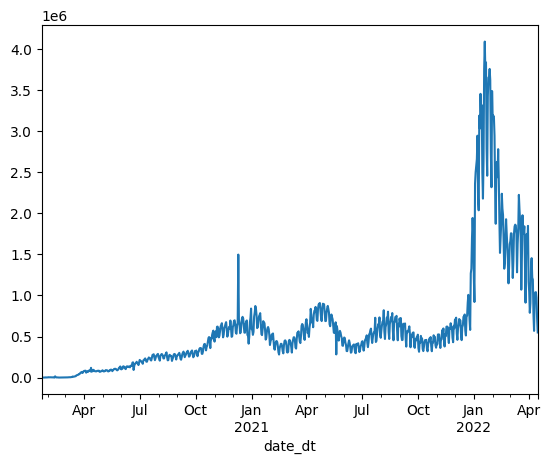

In [48]:
covid_world['confirmed_delta'].plot.line();

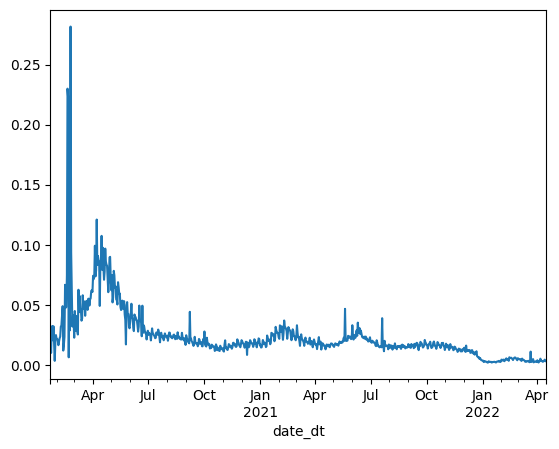

In [51]:
(covid_world['deaths_delta'] / covid_world['confirmed_delta']).plot.line();

если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс умереть больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа.

In [ ]:
X ... symptoms ... illness ... recovered

In [66]:
# с каким лагом переменной confirmed_delta корреляция deaths_delta будет наибольшей?
lags = list(range(51))
coefs = []

for lag in lags:
    confirmed_shifted = covid_world['confirmed_delta'].shift(lag, fill_value=0)
    coef = np.corrcoef(confirmed_shifted.values, covid_world['deaths_delta'].values)[0, 1]

    coefs.append(coef)

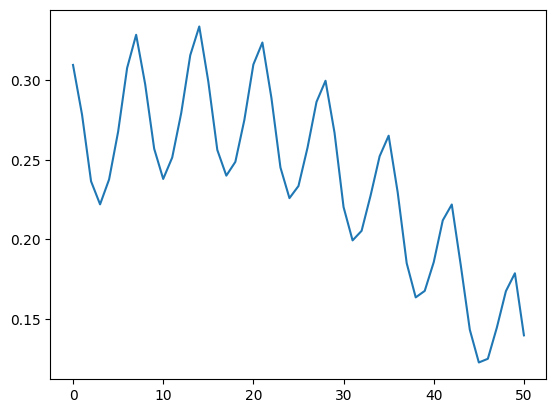

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(lags, coefs);

In [71]:
np.array(coefs).argmax()

14

In [72]:
coefs[np.array(coefs).argmax()]

0.33347483238685727

In [73]:
lags[np.array(coefs).argmax()]

14

Проверим полученный коэффициент корреляции на значимость.

In [ ]:
# H0: корреляция случайная, на самом деле ее нет

# PLAN
# фиксируем значения по переменной deaths_delta
# значения по confirmed_delta переставляем случайным образом

In [77]:
def simulate_cor(vector1, vector2):
    vector2_p = np.random.permutation(vector2)
    coef = np.corrcoef(vector1, vector2_p)[0, 1]

    return coef

In [78]:
N = 100000

random_coefs = [
    simulate_cor(
        covid_world['deaths_delta'].values,
        covid_world['confirmed_delta'].shift(14, fill_value=0).values
    )
    for i
    in range(N)
]

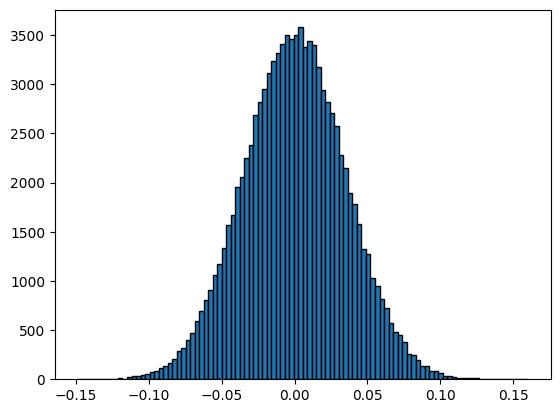

In [79]:
fig, ax = plt.subplots()

ax.hist(random_coefs, bins=100, edgecolor='black');

In [80]:
coefs[np.array(coefs).argmax()]

0.33347483238685727

#### Задание 4

Изобразите распределение всех трех показателей прироста с помощью:

1. Гистограммы
2. Ящика с усами (boxplot)
3. Функции распределения

На одном графике.

Повторите то же самое для логарифмированных показателей.

In [9]:
def country_delta(group_df: pd.DataFrame) -> pd.DataFrame:
    group_df = group_df.sort_values(by='date_dt')

    for col in numeric_new:
        group_df[f'{col}_delta'] = group_df[col].diff().fillna(group_df[col].values[0])
        group_df.loc[group_df[f'{col}_delta'] < 0, f'{col}_delta'] = 0

    return group_df

covid_delta = covid_agg.groupby(['country_region'], as_index=False).apply(country_delta).reset_index(drop=True)

# make distribution smoother
for col in numeric_new:
        covid_delta[f'{col}_log'] = np.log(covid_delta[f'{col}_delta'].values + 1)
    
covid_delta.head()

,date,date_dt,country_region,confirmed,recovered,deaths,confirmed_delta,recovered_delta,deaths_delta,confirmed_log,recovered_log,deaths_log
0,2020-01-22,2020-01-22,Afghanistan,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,2020-01-23,Afghanistan,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,2020-01-24,Afghanistan,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,2020-01-25,Afghanistan,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,2020-01-26,Afghanistan,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist()

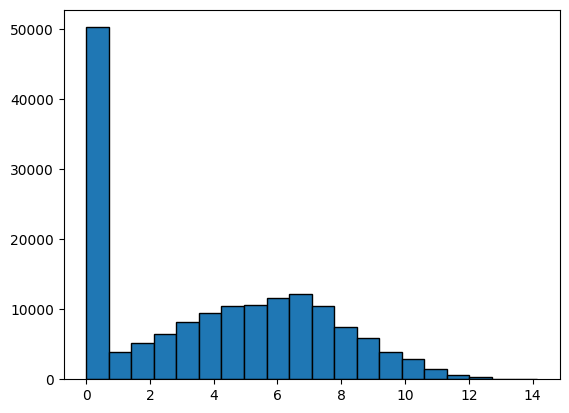

In [32]:
fig, ax = plt.subplots()

ax.hist(covid_delta['confirmed_log'], bins=20, edgecolor='black');

In [71]:
covid_world.head()

,date,date_dt,confirmed,recovered,deaths,confirmed_delta,recovered_delta,deaths_delta
date_dt,,,,,,,,
2020-01-22,2020-01-22,2020-01-22,557,30.0,17,557.0,30.0,17.0
2020-01-23,2020-01-23,2020-01-23,657,32.0,18,100.0,2.0,1.0
2020-01-24,2020-01-24,2020-01-24,944,39.0,26,287.0,7.0,8.0
2020-01-25,2020-01-25,2020-01-25,1437,42.0,42,493.0,3.0,16.0
2020-01-26,2020-01-26,2020-01-26,2120,56.0,56,683.0,14.0,14.0


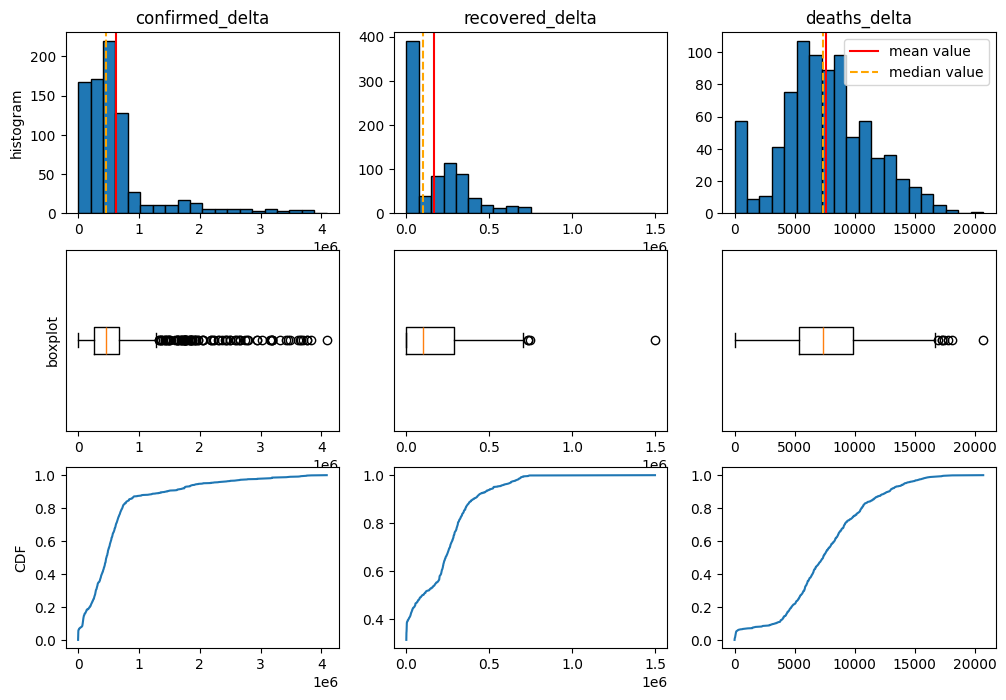

In [88]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for index in range(len(numeric_new)):
    colname = numeric_new[index] + '_delta'

    colmean = covid_world[colname].mean()
    colmedian = covid_world[colname].median()

    # histogram
    axes[0, index].hist(covid_world[colname], bins=20, edgecolor='black')
    axes[0, index].set_title(colname)

    axes[0, index].axvline(colmean, color='red', label='mean value')
    axes[0, index].axvline(colmedian, color='orange', linestyle='dashed', label='median value')
    
    if index == 0:
        axes[0, index].set_ylabel('histogram')
        
    if index == 2:
        axes[0, index].legend()

    # boxplots
    axes[1, index].boxplot(covid_world[colname], vert=False, meanline=True)
    axes[1, index].set_yticks([])

    if index == 0:
        axes[1, index].set_ylabel('boxplot')

    # cumulative distribution function
    array = np.sort(covid_world[colname].values)
    fx = (array <= array.reshape((array.size, 1))).mean(axis=1)

    axes[2, index].plot(array, fx, '-')

    if index == 0:
        axes[2, index].set_ylabel('CDF')

In [76]:
array = covid_world['confirmed_delta'].values

In [78]:
(array <= 600000).mean()

0.6703431372549019

In [79]:
array.reshape((array.size, 1))

array([[5.570000e+02],
       [1.000000e+02],
       [2.870000e+02],
       [4.930000e+02],
       [6.830000e+02],
       [8.090000e+02],
       [2.651000e+03],
       [5.890000e+02],
       [2.068000e+03],
       [1.690000e+03],
       [2.111000e+03],
       [4.749000e+03],
       [3.100000e+03],
       [4.012000e+03],
       [3.745000e+03],
       [3.162000e+03],
       [3.594000e+03],
       [2.731000e+03],
       [3.031000e+03],
       [2.609000e+03],
       [2.043000e+03],
       [4.180000e+02],
       [1.515200e+04],
       [6.528000e+03],
       [2.143000e+03],
       [2.183000e+03],
       [2.035000e+03],
       [1.882000e+03],
       [5.000000e+02],
       [5.610000e+02],
       [6.300000e+02],
       [1.762000e+03],
       [3.820000e+02],
       [5.680000e+02],
       [8.540000e+02],
       [9.730000e+02],
       [1.345000e+03],
       [1.424000e+03],
       [1.876000e+03],
       [2.380000e+03],
       [1.983000e+03],
       [2.611000e+03],
       [2.325000e+03],
       [2.7

In [66]:
array

array([0.        , 0.        , 0.        , ..., 3.8918203 , 3.40119738,
       0.        ])

In [80]:
array.size

816

In [84]:
(array <= array.reshape((array.size, 1)))

array([[ True,  True,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False, False,  True]])

In [83]:
(array <= array.reshape((array.size, 1))).mean(axis=1)

array([0.00857843, 0.00122549, 0.00245098, 0.00612745, 0.01470588,
       0.01593137, 0.04044118, 0.0122549 , 0.03063725, 0.02205882,
       0.03186275, 0.05637255, 0.04534314, 0.05269608, 0.04901961,
       0.04656863, 0.04779412, 0.04289216, 0.04411765, 0.0379902 ,
       0.02941176, 0.00490196, 0.06740196, 0.05882353, 0.03308824,
       0.03431373, 0.02818627, 0.02573529, 0.00735294, 0.00980392,
       0.01348039, 0.02328431, 0.00367647, 0.01102941, 0.01715686,
       0.01838235, 0.01960784, 0.02083333, 0.0245098 , 0.03676471,
       0.02696078, 0.03921569, 0.03553922, 0.04166667, 0.05147059,
       0.05392157, 0.0502451 , 0.05514706, 0.05759804, 0.06127451,
       0.06004902, 0.06495098, 0.0625    , 0.06372549, 0.06617647,
       0.06862745, 0.06985294, 0.07107843, 0.07230392, 0.07352941,
       0.0747549 , 0.07720588, 0.07598039, 0.07843137, 0.08210784,
       0.08333333, 0.0870098 , 0.07965686, 0.08455882, 0.11151961,
       0.11397059, 0.11764706, 0.12254902, 0.08088235, 0.09191

In [63]:
array <= 25

array([ True,  True,  True, ...,  True,  True,  True])

In [61]:
array

array([0.        , 0.        , 0.        , ..., 3.8918203 , 3.40119738,
       0.        ])

In [ ]:
5, 0, -3, 8, -2

-3, -2, 0, 5, 8

In [ ]:
F(0) = 0.6
F(8) = 1
F(-9) = 0

F(x) = P(X <= x)

In [34]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

#### Задание 5

Изобразите для шести понравившихся вам стран взаимосвязь между логарифмированными показателями прироста заболевших и умерших (по графику на страну, все на одной картинке). Сделайте это тремя способами: с помощью `matplotlib`, `seaborn` и `plotly`.

In [11]:
def custom_corr(group_df: pd.DataFrame) -> float:
    corr = np.corrcoef(group_df['confirmed_log'].values, group_df['deaths_log'].values)[0, 1]

    return corr

In [18]:
# 3 страны с максимальной корреляцией между показателями и 3 с минимальной
corrs = [
    (group[0], custom_corr(df)) for group, df in covid_delta.groupby(['country_region'])[['confirmed_log', 'deaths_log']]
]
corrs_df = pd.DataFrame(corrs, columns=['country', 'correlation']).dropna()

/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [34]:
corrs_df_sorted = corrs_df.sort_values(by='correlation', ignore_index=True)
chosen_countries = corrs_df_sorted.loc[[0, 1, 2, *corrs_df_sorted.index[-3:].tolist()], 'country'].tolist()

In [32]:
chosen_countries

0         Burundi
1      Kazakhstan
2          Monaco
189        Mexico
190         India
191       Ukraine
Name: country, dtype: object

In [25]:
import matplotlib.pyplot as plt

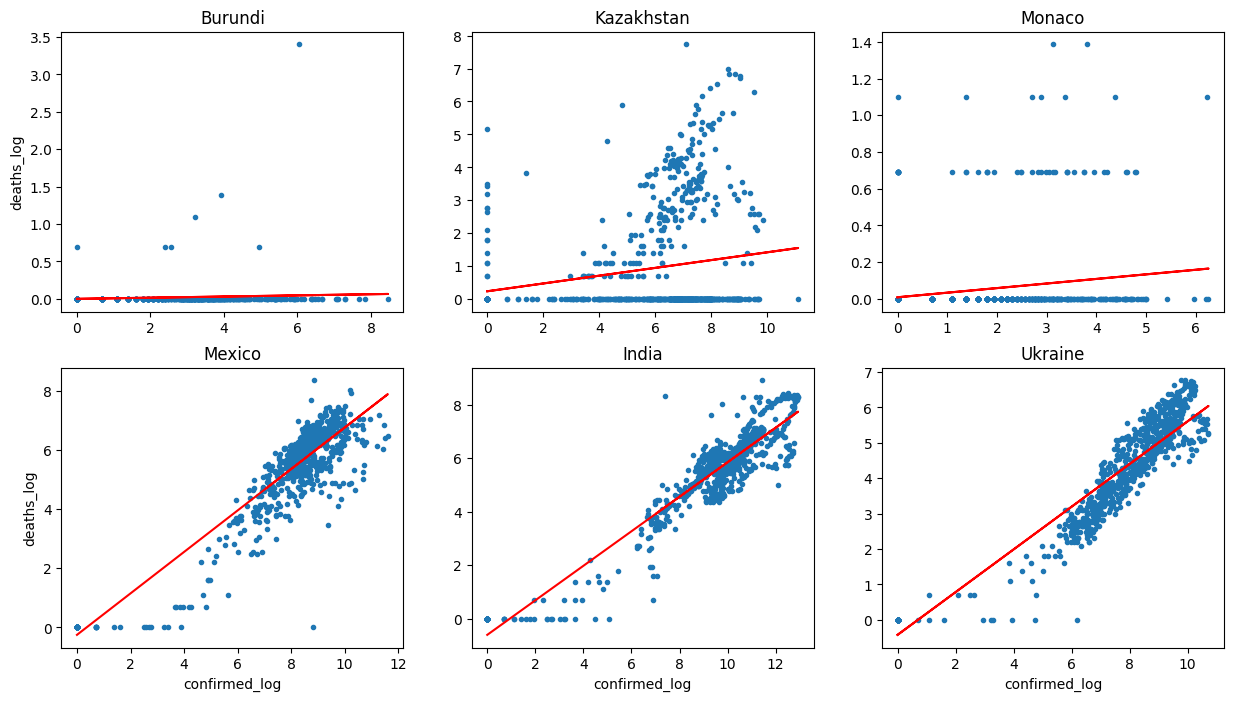

In [41]:
# matlotlib
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for index, country in enumerate(chosen_countries):
    country_df = covid_delta[covid_delta['country_region'] == country]

    row_index = index // 3
    col_index = index % 3

    X = country_df['confirmed_log'].values
    y = country_df['deaths_log'].values

    # main plot
    axes[row_index, col_index].plot(X, y, marker='.', linestyle='None')
    axes[row_index, col_index].set_title(country)

    if col_index == 0:
        axes[row_index, col_index].set_ylabel('deaths_log')

    if row_index == 1:
        axes[row_index, col_index].set_xlabel('confirmed_log')

    # add regression line
    a, b = np.polyfit(X, y, 1)

    y_pred = b + a * X

    axes[row_index, col_index].plot(X, y_pred, color='red')

In [ ]:
# seaborn

In [42]:
import seaborn as sns

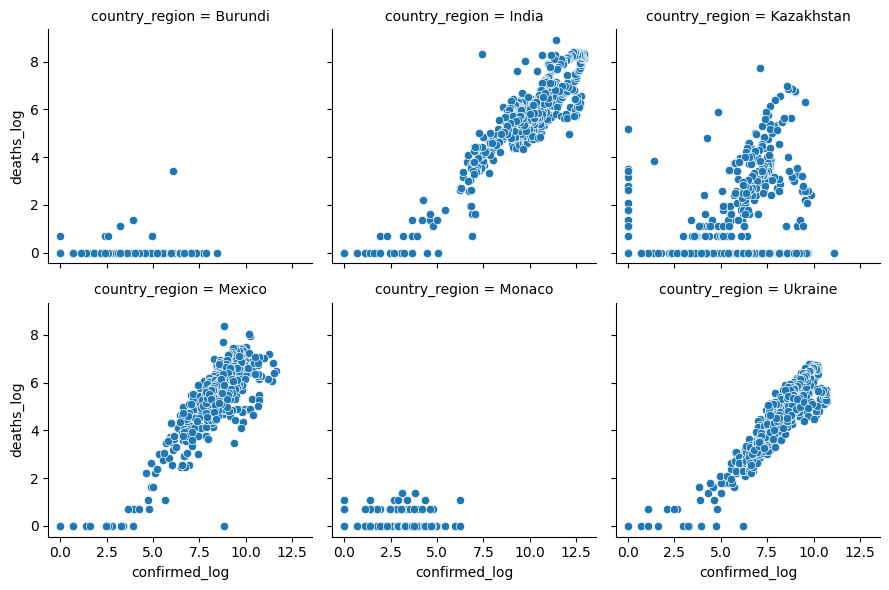

In [46]:
covid_delta_f = covid_delta[covid_delta['country_region'].isin(chosen_countries)]

grid = sns.FacetGrid(covid_delta_f, col='country_region', col_wrap=3)
grid.map(sns.scatterplot, 'confirmed_log', 'deaths_log');